## 가상 데이터를 이용한 알고리즘 구현

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.svm import SVC, SVR    # Support Vector
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score    # 모델 평가

In [32]:
np.random.seed(42)  # (cf) 시드값 42는 값의 분포가 잘 나오는 숫자라고 함
# 분류용 데이터
X_clf = np.random.rand(100, 5)  # 5개의 특성 생성
y_clf = np.random.randint(0,2,100)  # 0,1 랜덤하게 100개 생성

In [33]:
# 회귀용 데이터
X_reg = np.random.rand(100,3)
# 회귀방정식 y = bi + a1*x1 + a2*x2 + ... + aixi + Error
y_reg = 2 + 3*X_reg[:,0] + 1.5*X_reg[:,1] - 2*X_reg[:,2] + np.random.randn(100)*0.1

#### 데이터 분할

In [34]:
# 데이터를 분할하는 순서에 맞게 train, test로 나누어 주는 것: train_test_split
# train_test_split(데이터1,데이터2) 최대 2개 들어감
# train_test_split(데이터1,데이터2, test_size=0.2) train:test = 8:2
# train_test_split(데이터1,데이터2, test_size=0.2, random_state=42) 분할방법 랜덤하게: 랜덤시드 42로 설정
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [35]:
# 데이터 분할이 8:2로 올바르게 되었는지 확인 (반드시 확인하기!)
X_clf_train.shape, y_clf_train.shape, X_clf_test.shape, y_clf_test.shape

((80, 5), (80,), (20, 5), (20,))

#### Scaling

In [36]:
scaler = StandardScaler()
# scaler.fit_transform(데이터1)
# 학습 데이터는 스케일링을 하되, 테스트 데이터는 스케일링을 하면 안된다!
# 주의할 점: 학습 데이터인 X: train, test는 스케일링을 함, validation, test 데이터를 말하는 것!
X_clf_train_scaled = scaler.fit_transform(X_clf_train)
X_clf_test_scaled = scaler.fit_transform(X_clf_test)
X_reg_train_scaled = scaler.fit_transform(X_reg_train)
X_reg_test_scaled = scaler.fit_transform(X_reg_test)

#### Modeling

In [37]:
# kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_clf_train_scaled, y_clf_train)    # kNN 학습

KNeighborsClassifier()

In [38]:
knn_pred = knn.predict(X_clf_test_scaled)
print(f"KNN Accuracy: {accuracy_score(y_clf_test, knn_pred)}")

KNN Accuracy: 0.45


In [39]:
# SVM: Support Vector Machine
# SVC(커널방식, 랜덤시드)
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_clf_train, y_clf_train)
svm_pred = svm.predict(X_clf_test_scaled)
print(f"SVC Accuracy: {accuracy_score(y_clf_test, svm_pred)}")
print(f"SVC F1-Score: {f1_score(y_clf_test, svm_pred)}")

SVC Accuracy: 0.5
SVC F1-Score: 0.0


In [ ]:
# SVC 에 입력할 수 있는 Parameter 종류 확인 코드
# ?SVC

In [41]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_clf_train_scaled, y_clf_train)
tree_pred = tree.predict(X_clf_test_scaled)
print(f"DC Tree Accuracy: {accuracy_score(y_clf_test, tree_pred)}")
print(f"DC Tree F1-Score: {f1_score(y_clf_test, tree_pred)}")

DC Tree Accuracy: 0.55
DC Tree F1-Score: 0.4


#### 시각화

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.inspection import PartialDependenceDisplay

In [43]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

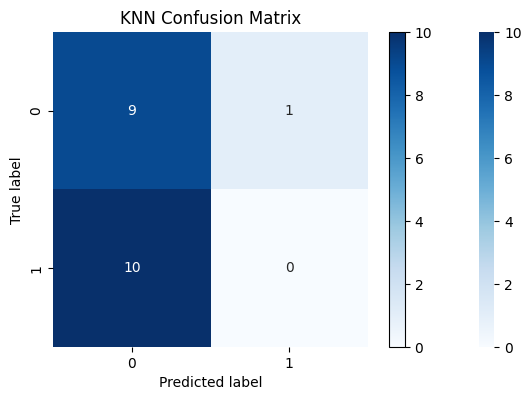

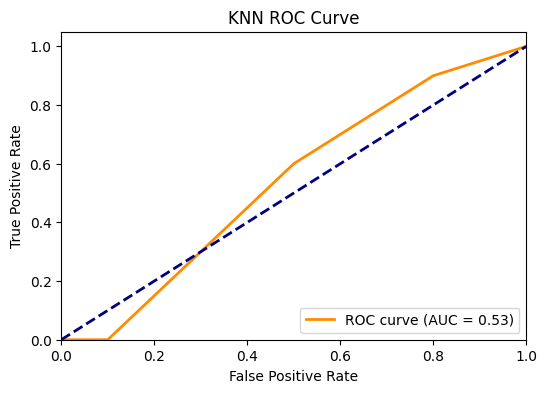

In [44]:
# KNN visualize
plot_confusion_matrix(y_clf_test, knn_pred, "KNN Confusion Matrix")
plot_roc_curve(y_clf_test, knn.predict_proba(X_clf_test_scaled)[:,1], "KNN ROC Curve")

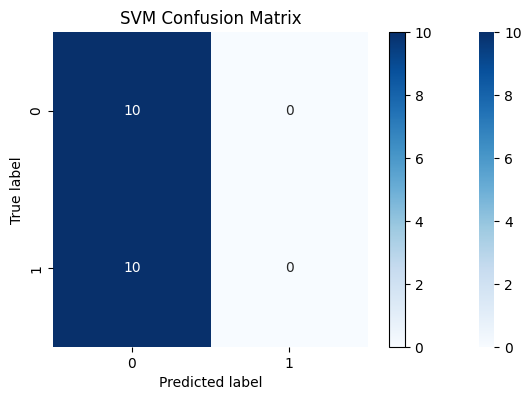

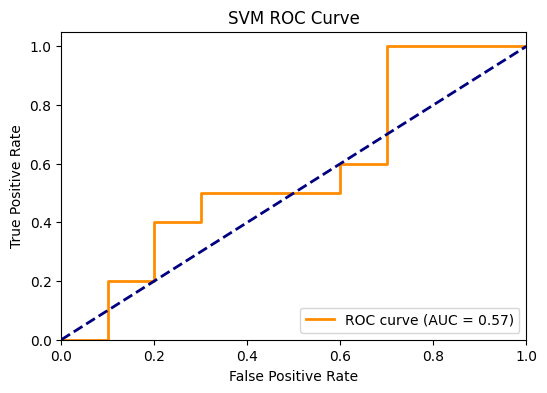

In [25]:
# SVM
plot_confusion_matrix(y_clf_test, svm_pred, "SVM Confusion Matrix")
plot_roc_curve(y_clf_test, svm.decision_function(X_clf_test_scaled), "SVM ROC Curve")

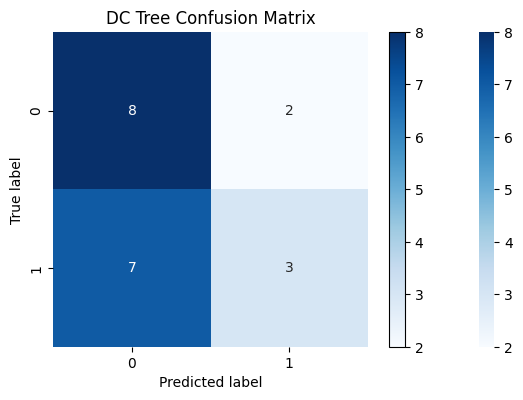

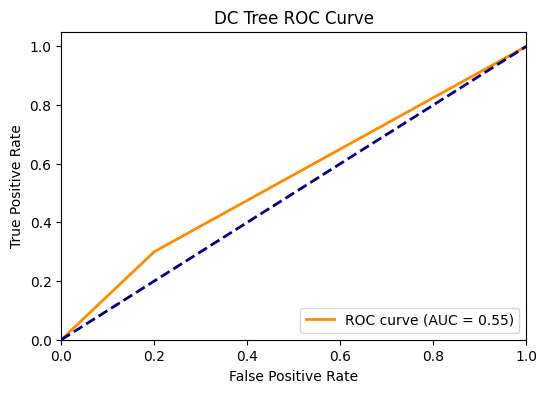

In [26]:
# DC tree
plot_confusion_matrix(y_clf_test, tree_pred, "DC Tree Confusion Matrix")
plot_roc_curve(y_clf_test, tree.predict_proba(X_clf_test_scaled)[:,1], "DC Tree ROC Curve")

### Regression

In [45]:
X_reg_train.shape, X_reg_test.shape

((80, 3), (20, 3))

In [47]:
# SVR
# 1. 뼈대 만들기
# 2. 데이터 넣기
svr = SVR(kernel='rbf')
svr.fit(X_reg_train_scaled, y_reg_train)
svr_pred = svr.predict(X_reg_test_scaled)
print(f"SVR R2 Score: {r2_score(y_reg_test, svr_pred)}")

SVR R2 Score: 0.9290963830420252


In [48]:
# Linear, Polynomial
lr = LinearRegression()
lr.fit(X_reg_train_scaled, y_reg_train)
lr_pred = lr.predict(X_reg_test_scaled)

poly = PolynomialFeatures(degree=2) # 2차원 형태
X_reg_train_poly = poly.fit_transform(X_reg_train_scaled)
X_reg_test_poly = poly.fit_transform(X_reg_test_scaled)
pr = LinearRegression()
pr.fit(X_reg_train_poly, y_reg_train)
pr_pred = pr.predict(X_reg_test_poly)

print(f"Linear Reg. R2: {r2_score(y_reg_test, lr_pred)}")
print(f"Poly Reg. R2: {r2_score(y_reg_test, pr_pred)}")


Linear Reg. R2: 0.9308795762983795
Poly Reg. R2: 0.9308324600121196


In [50]:
# Ridge, Lasso, EN
ridge = Ridge(alpha=1.)
ridge.fit(X_reg_train_scaled, y_reg_train)
ridge_pred = ridge.predict(X_reg_test_scaled)
print(f"Ridge R2 Score: {r2_score(y_reg_test, ridge_pred)}")

lasso = Lasso(alpha=1.)
lasso.fit(X_reg_train_scaled, y_reg_train)
lasso_pred = lasso.predict(X_reg_test_scaled)
print(f"Lasso R2 Score: {r2_score(y_reg_test, lasso_pred)}")

elastic = ElasticNet(alpha=1., l1_ratio=0.5)
elastic.fit(X_reg_train_scaled, y_reg_train)
elastic_pred = elastic.predict(X_reg_test_scaled)
print(f"Lasso R2 Score: {r2_score(y_reg_test, elastic_pred)}")

Ridge R2 Score: 0.9302700662129618
Lasso R2 Score: -0.04424588781548788
Lasso R2 Score: 0.4060697479598905


#### 시각화

In [51]:
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred # 오차 계산
    plt.figure(figsize=(6, 4))  # 그래프 사이즈 지정
    plt.scatter(y_pred, residuals)  # 점을 찍는 plot (데이터, 잔차값)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.axhline(y=0, color='r', linestyle='--') # 어떤 선을 그릴지
    plt.tight_layout()
    plt.show()

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title(title)
    plt.tight_layout()
    plt.show()

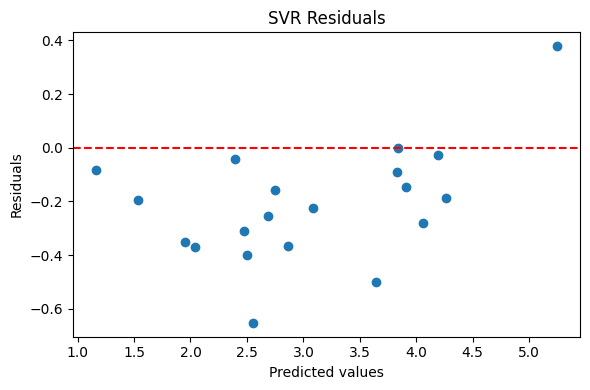

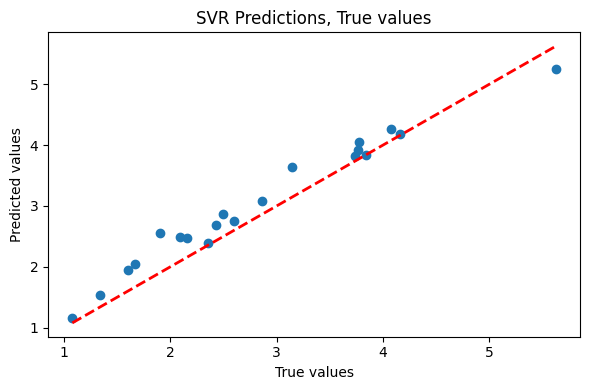

In [53]:
# SVR
plot_residuals(y_reg_test, svr_pred, "SVR Residuals")
plot_predictions(y_reg_test, svr_pred, "SVR Predictions, True values")

#### Feature importance

Text(0.5, 1.0, 'DC Tree Feature Importance')

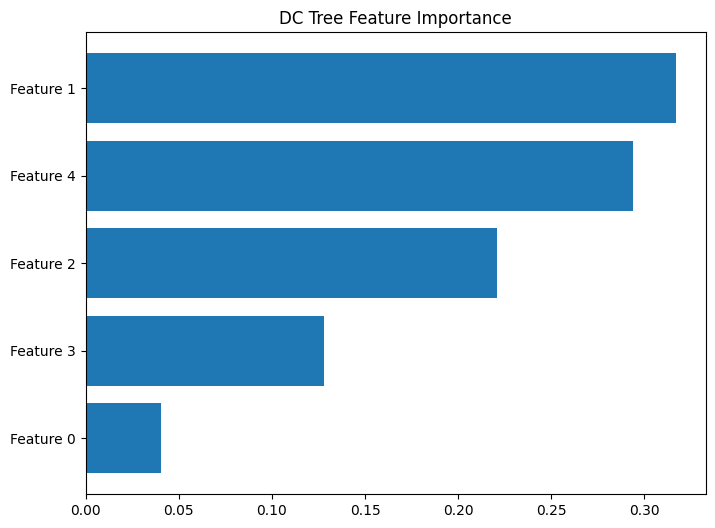

In [55]:
# Decision Tree FI
plt.figure(figsize=(8,6))
feature_importance = tree.feature_importances_
feature_names = [f'Feature {i}' for i in range(X_clf.shape[1])] # 5개의 열이 있다면 각 열의 특성명을 Feature 1, Feature 2 ... 처럼 설정함
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])

plt.title("DC Tree Feature Importance")

## 실제 데이터를 이용한 알고리즘 구현

### 환경 구성

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import PartialDependenceDisplay

### 데이터 로드

In [59]:
data = load_breast_cancer() # 유방암 데이터 불러오기
X = data.data
y = data.target
feature_names = data.feature_names
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [61]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### Scaling

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Modeling(Classification)

In [64]:
def train_and_pred(model,X_train,X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)     # 데이터 학습
    y_pred = model.predict(X_test)  # 추론
    accuarcy = accuracy_score(y_test, y_pred)   # 정확도
    print(f"{model_name} Accuracy: {accuarcy:.3f}")
    return model, y_pred

In [66]:
# KNN
knn, knn_pred = train_and_pred(
    KNeighborsClassifier(n_neighbors=5),
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    "knn"
)


knn Accuracy: 0.956


In [86]:
# SVC
svc, svc_pred = train_and_pred(
    SVC(kernel='rbf'),
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    "svc"
)

svc Accuracy: 0.982


In [68]:
# Tree
tree, tree_pred = train_and_pred(
    DecisionTreeClassifier(random_state=42),
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    "DC Tree"
)

DC Tree Accuracy: 0.921


### Visualization

In [79]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

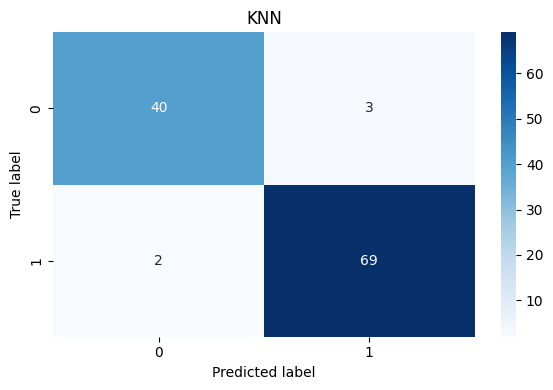

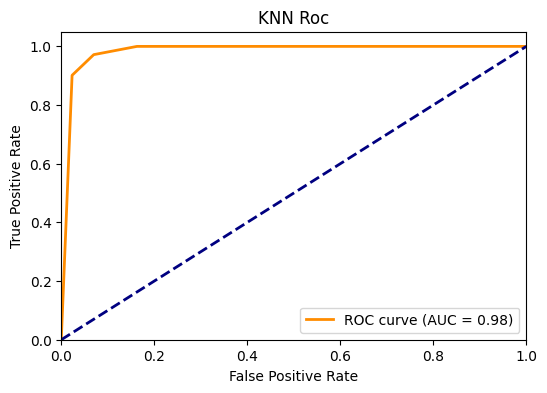

In [80]:
plot_confusion_matrix(y_test, knn_pred, "KNN")
plot_roc_curve(y_test, knn.predict_proba(X_test_scaled)[:,1], "KNN Roc")

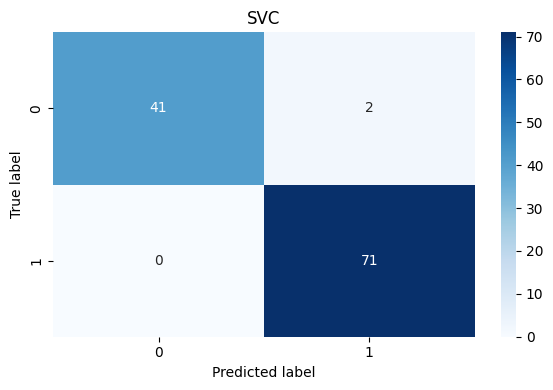

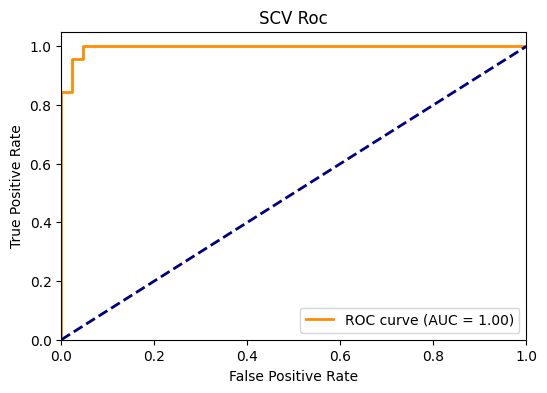

In [88]:
plot_confusion_matrix(y_test,svc_pred, "SVC")
plot_roc_curve(y_test, svc.decision_function(X_test_scaled), "SCV Roc")

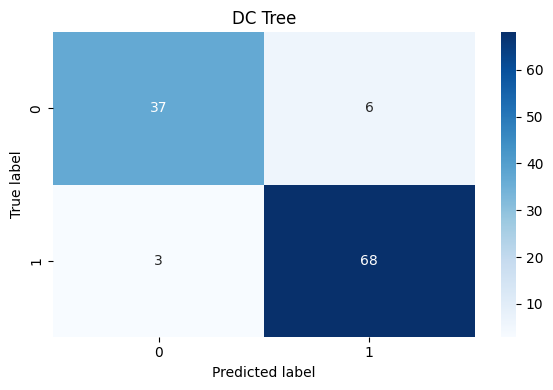

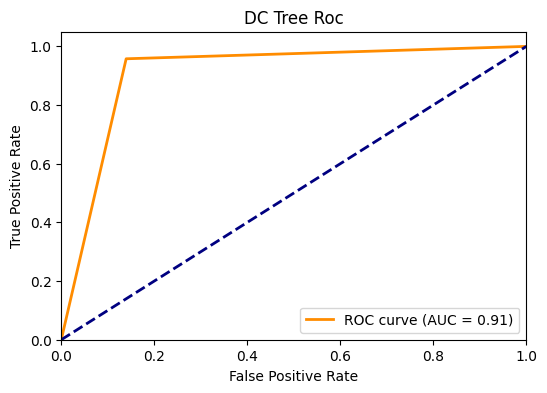

In [89]:
plot_confusion_matrix(y_test,tree_pred, "DC Tree")
plot_roc_curve(y_test, tree.predict_proba(X_test_scaled)[:,1], "DC Tree Roc")

Text(0.5, 1.0, 'DC Tree Feature Importance')

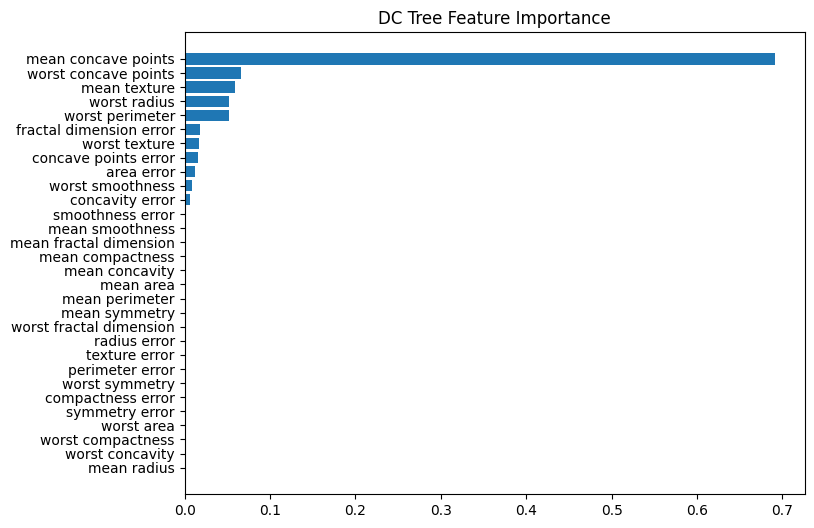

In [90]:
# Feature importance
# feature names : Data load에 이 변수 선언되어있음

plt.figure(figsize=(8,6))
feature_importance = tree.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])

plt.title("DC Tree Feature Importance")

### Scailing

In [91]:
# target: mean radius
y_reg = X[:,0]
X_reg = X[:, 1:]

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=.2, random_state=42)

X_reg_train_scaled = scaler.fit_transform(X_reg_train)
X_reg_test_scaled = scaler.fit_transform(X_reg_test)

### Modeling(Regression)

In [92]:
def train_and_reg_pred(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} MSE: {mse}, R2: {r2}")
    return model, y_pred

In [93]:
# Linear Reg
lr, lr_pred = train_and_reg_pred(
    LinearRegression(),
    X_reg_train_scaled,
    X_reg_test_scaled,
    y_reg_train,
    y_reg_test,
    "Linear Regression"
)

Linear Regression MSE: 0.008584034888224495, R2: 0.999289768091084


In [94]:
# Elastic
elastic, elastic_pred = train_and_reg_pred(
    ElasticNet(alpha=1., l1_ratio=0.5),
    X_reg_train_scaled,
    X_reg_test_scaled,
    y_reg_train,
    y_reg_test,
    "ElasticNet Regression"
)

ElasticNet Regression MSE: 0.7920271807899667, R2: 0.9344686987121359


### Visualization

In [95]:
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred # 오차 계산
    plt.figure(figsize=(6, 4))  # 그래프 사이즈 지정
    plt.scatter(y_pred, residuals)  # 점을 찍는 plot (데이터, 잔차값)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.axhline(y=0, color='r', linestyle='--') # 어떤 선을 그릴지
    plt.tight_layout()
    plt.show()

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title(title)
    plt.tight_layout()
    plt.show()

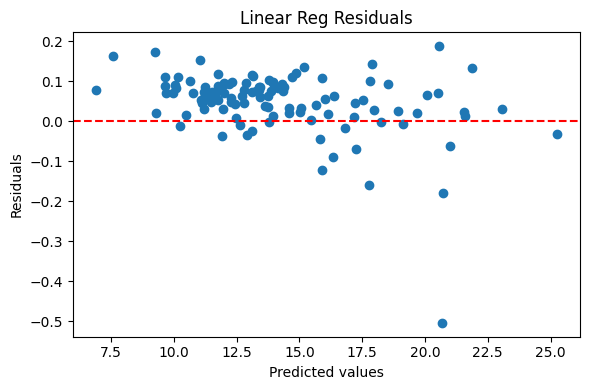

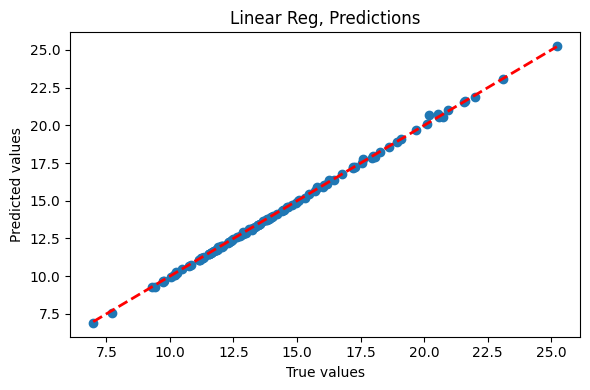

In [96]:
plot_residuals(y_reg_test, lr_pred, "Linear Reg Residuals")
plot_predictions(y_reg_test, lr_pred, "Linear Reg, Predictions")

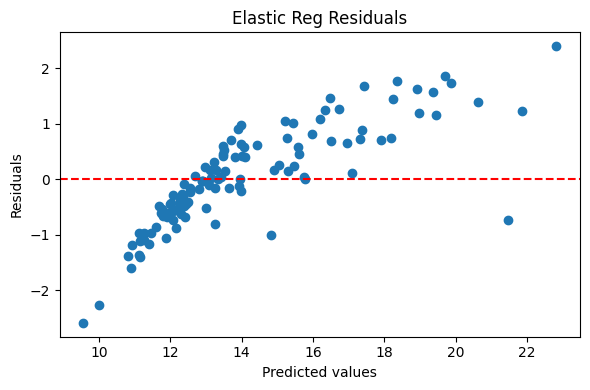

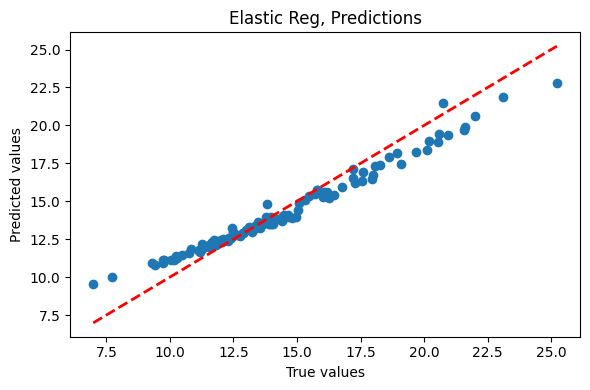

In [97]:
plot_residuals(y_reg_test, elastic_pred, "Elastic Reg Residuals")
plot_predictions(y_reg_test, elastic_pred, "Elastic Reg, Predictions")

### RandomForest

In [98]:
from sklearn.metrics import recall_score, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [99]:
def get_score(y_true, y_pred):
    print(f"잘못 분류한 샘플 개수: {(y_true != y_pred).sum()}")
    print(f"정확도: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_true=y_test, y_pred=y_pred):.3f}")    # 중요 수치

In [101]:
forest = RandomForestClassifier(max_depth=5, n_estimators=200)
forest.fit(X_train_scaled, y_train)
forest_pred = forest.predict(X_test_scaled)

In [102]:
get_score(y_test, forest_pred)

잘못 분류한 샘플 개수: 4
정확도: 0.965
Recall: 0.986
Precision: 0.959
F1 Score: 0.972


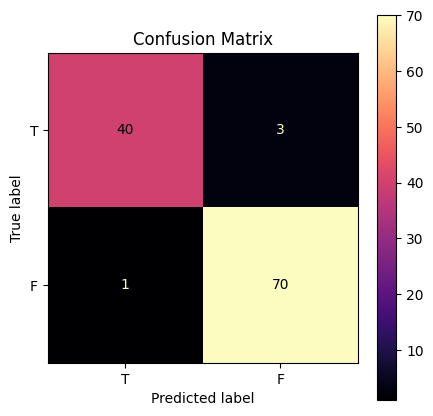

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, forest_pred, ax=ax, display_labels='TF', cmap='magma')

In [106]:
# Randomforest 모델의 parameter 확인
list(forest.get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'monotonic_cst',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

### GridSearch

In [107]:
from sklearn.model_selection import GridSearchCV    # 데이터를 교차 검증할 때 사용

param = {
    'max_depth': [i for i in range(5,11)],
    'n_estimators': [400, 500, 600]
}

# cv : cross validation
# 서로 다른 샘플링 데이터를 만드는 것
grid = GridSearchCV(estimator=forest,
                    param_grid=param,
                    cv=10,
                    scoring='roc_auc')

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=200),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [400, 500, 600]},
             scoring='roc_auc')

In [108]:
# optimal param
print(f"Optimal Param: {grid.best_params_}")
print(f"AUC: {grid.best_score_}")

Optimal Param: {'max_depth': 8, 'n_estimators': 500}
AUC: 0.9908812662996231


In [109]:
# 최적의 param 값으로 바꾼 뒤 다시 fit
# Optimal Param: {'max_depth': 8, 'n_estimators': 500}
forest = RandomForestClassifier(max_depth=5, n_estimators=500)
forest.fit(X_train_scaled, y_train)
forest_pred = forest.predict(X_test_scaled)

In [110]:
get_score(y_test, forest_pred)

잘못 분류한 샘플 개수: 4
정확도: 0.965
Recall: 0.986
Precision: 0.959
F1 Score: 0.972


In [114]:
!pip install xgboost

In [1]:
from xgboost import XGBClassifier

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/seoseondeok/miniconda3/envs/esg/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <6749C431-FD87-3912-A7CF-11CB9194D072> /Users/seoseondeok/miniconda3/envs/esg/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/Users/seoseondeok/miniconda3/envs/esg/lib/python3.10/lib-dynload/../../libomp.dylib' (no such file), '/Users/seoseondeok/miniconda3/envs/esg/bin/../lib/libomp.dylib' (no such file)"]
